In [15]:
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as n
import pandas as p
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [17]:
import pandas as pd

In [18]:
df=pd.read_csv("G://programs//sonar.csv")

In [19]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [20]:
df.shape

(208, 61)

In [21]:
def read_database():
    X=df[df.columns[1:60]].values
    y=df[df.columns[60]]
    encoder=LabelEncoder()
    encoder.fit(y)
    y=encoder.transform(y)
    Y=one_hot_encode(y)
    return(X,Y,y)

In [22]:
def feature_normalize(features):
    mu=n.mean(features,axis=0)         #normalize the features of the dataset
    sigma=n.std(features,axis=0)
    normalize_features=(features-mu)/sigma
    return(normalize_features)

In [23]:

def append_bias_reshape(features):
    n_training_samples=features.shape[0]
    n_dim=features.shape[1]
    features=np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim+1])
    return(features)

In [24]:
def one_hot_encode(labels):
    n_labels=len(labels)
    n_unique_labels=len(n.unique(labels))
    one_hot_encode=n.zeros((n_labels,n_unique_labels))
    one_hot_encode[n.arange(n_labels),labels]=1
    return(one_hot_encode)

In [27]:
print(X)

[[0.0371 0.0428 0.0207 ... 0.0084 0.009  0.0032]
 [0.0523 0.0843 0.0689 ... 0.0049 0.0052 0.0044]
 [0.0582 0.1099 0.1083 ... 0.0164 0.0095 0.0078]
 ...
 [0.0437 0.018  0.0292 ... 0.0138 0.0077 0.0031]
 [0.0353 0.049  0.0608 ... 0.0079 0.0036 0.0048]
 [0.0363 0.0136 0.0272 ... 0.0036 0.0061 0.0115]]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.20,random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(166, 59)
(42, 59)
(166, 2)
(42, 2)


In [66]:
n_input=59
n_output=2
n_hidden_1=110
n_hidden_2=110
n_hidden_3=110
n_hidden_4=110

In [67]:
x=tf.placeholder(tf.float32,[None,n_input])
y_=tf.placeholder(tf.float32,[None,n_output])

In [68]:
weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.random_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.random_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.random_normal([n_hidden_4,n_output]))
}
bias={
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'b3':tf.Variable(tf.random_normal([n_hidden_3])),
    'b4':tf.Variable(tf.random_normal([n_hidden_4])),
    'out':tf.Variable(tf.random_normal([n_output]))
}    

In [69]:
def multilayer_perceptron(x,weights,bias):
    layer_1=tf.add(tf.matmul(x,weights['h1']),bias['b1'])
    layer_1=tf.nn.relu(layer_1)
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),bias['b2'])
    layer_2=tf.nn.relu(layer_2)
    layer_3=tf.add(tf.matmul(layer_2,weights['h3']),bias['b3'])
    layer_3=tf.nn.relu(layer_3)
    layer_4=tf.add(tf.matmul(layer_3,weights['h4']),bias['b4'])
    layer_4=tf.nn.relu(layer_4)
    output=tf.matmul(layer_3,weights['out'])+bias['out']
    return output

In [70]:
pred= multilayer_perceptron(x,weights,bias)

In [71]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y_))

In [78]:
learning_rate = 0.05
training_epochs=100
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [79]:
init=tf.global_variables_initializer()

In [80]:
sess=tf.Session()
sess.run(init)

In [81]:
cost_history=[]

In [82]:
for epoch in range(training_epochs):
    sess.run(optimizer,feed_dict={x:X_train,y_:y_train})
    cost=sess.run(loss,feed_dict={x:X_train,y_:y_train})
    cost_history=n.append(cost_history,cost)
    print('epoch:',epoch,'-','cost:',cost)    
    correct_prediction=tf.equal(tf.argmax(pred,1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(accuracy,feed_dict=({x: X_train, y_: y_train})))

epoch: 0 - cost: 3512.4993
0.5120482
epoch: 1 - cost: 1027.0059
0.5120482
epoch: 2 - cost: 1293.9109
0.48795182
epoch: 3 - cost: 1309.4973
0.48795182
epoch: 4 - cost: 611.0908
0.48795182
epoch: 5 - cost: 157.36911
0.6204819
epoch: 6 - cost: 421.72977
0.5421687
epoch: 7 - cost: 346.90707
0.5421687
epoch: 8 - cost: 94.73073
0.6325301
epoch: 9 - cost: 279.8992
0.5421687
epoch: 10 - cost: 251.29396
0.52409637
epoch: 11 - cost: 72.38686
0.59638554
epoch: 12 - cost: 72.68094
0.6626506
epoch: 13 - cost: 101.8444
0.560241
epoch: 14 - cost: 51.930325
0.64457834
epoch: 15 - cost: 40.889088
0.70481926
epoch: 16 - cost: 71.092606
0.60240966
epoch: 17 - cost: 38.70157
0.6927711
epoch: 18 - cost: 20.408958
0.76506025
epoch: 19 - cost: 51.03145
0.61445785
epoch: 20 - cost: 34.62835
0.686747
epoch: 21 - cost: 14.279723
0.8192771
epoch: 22 - cost: 27.125565
0.70481926
epoch: 23 - cost: 26.493511
0.6927711
epoch: 24 - cost: 11.197099
0.8313253
epoch: 25 - cost: 19.13567
0.77710843
epoch: 26 - cost: 22.7

In [83]:
correct_prediction=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy,feed_dict=({x: X_train, y: y_train})))

1.0


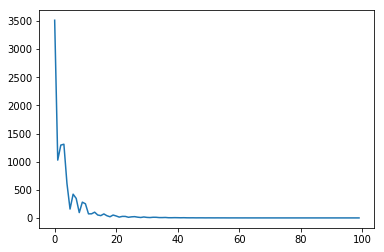

In [84]:
import matplotlib.pyplot as plt
plt.plot(cost_history)